In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from PRaccretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



# Various accretion parameters of Bondi-Hoyle-Lyttleton (BHL) 
# accretion model used in reference papaer M. Ricotti et al. 
# https://arxiv.org/abs/0709.0524.



def c_s(z):
    return c_s_Ricotti(z)

def v_pbh(z):
    return v_rel_digitized_Ricotti(z)

def v_eff(z):
    return v_eff_Ricotti(z)


def x_e(z):
    if z < z_rec:
        return e_fraction
    else:
        return 1
    
    
    
def β_cap(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff(z))**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))

    
def λ(z, m):
    def x_cr(z, m):
        return (-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m) 
    return np.exp((9/2)/(3 + β_cap(z, m)**(0.75))) * (x_cr(z, m)**2)

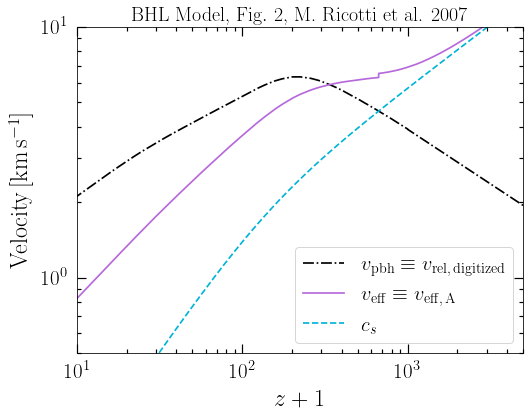

In [2]:
# Plot of v_eff = v_ff,A, c_s(z) and v_rel as per Fig. 2 of M. Ricotti et al. https://arxiv.org/abs/0709.0524.



fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_array = np.geomspace(1, 1e4, 10000)
cs_array = np.zeros(len(z_array))
v_eff_array = np.zeros(len(z_array))
v_pbh_digitized_array = np.zeros(len(z_array))



for i, z in enumerate(z_array):
    cs_array[i] = c_s(z) * (pc/yr) * 1e-3 
    v_eff_array[i] = v_eff(z) * (pc/yr) * 1e-3 
    v_pbh_digitized_array[i] = v_pbh(z) * (pc/yr) * 1e-3 
    

ax.loglog(z_array, v_pbh_digitized_array, 'k', ls = '-.') 
ax.loglog(z_array, v_eff_array, '#b669db')
ax.loglog(z_array, cs_array, '#00b4d8', ls = '--')



ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.ylim(0.5, 10)
plt.xlim(10, 5000)

plt.legend([r'$v_\mathrm{pbh} \equiv v_\mathrm{rel,\, digitized}$', r'$v_\mathrm{eff} \equiv v_\mathrm{eff, \, A}$', '$c_{s}$'],
           title_fontsize = 12, loc = 'lower right', prop = {"size":20.5})



plt.ylabel(r"Velocity$\, \mathrm{[km \,s^{-1}}]$ ", fontsize = 24, labelpad = 8)
plt.xlabel(r"$z + 1$", fontsize = 24, labelpad = 8)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.title('BHL Model, Fig$.~2$, M. Ricotti et al. 2007', fontsize = 20, pad = 6)
plt.savefig('Ricotti_velocities.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# Plot of β_cap(z+1) given by Eq. 24 for PBHs accreting in absence of DM halos 
# around them, as per M. Ricotti et al. https://arxiv.org/pdf/0709.0524.pdf.


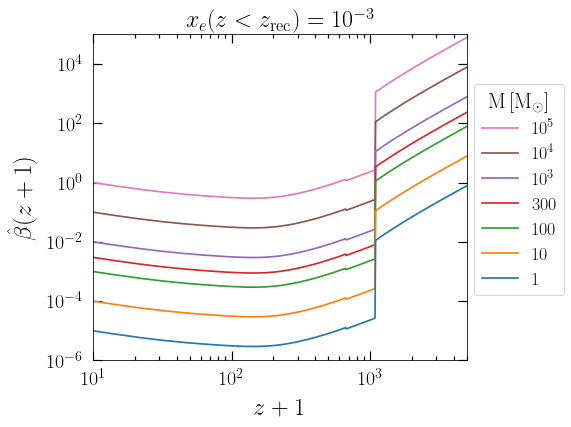

In [3]:
# When the electron fraction of the accreted gas after recombination is 
# considered as x_e = 1e-3.


colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1, 1e4, 1000)
β_cap_array = np.zeros(len(z_array))


for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1e-3
        β_cap_array[i] = β_cap(z, m)
    ax.loglog(z_array, β_cap_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)
plt.ylim(1e-6, 1e5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\hat \beta(z+1)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = (1.02, 0.2), prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 24, pad = 8)
plt.savefig('βvsz_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

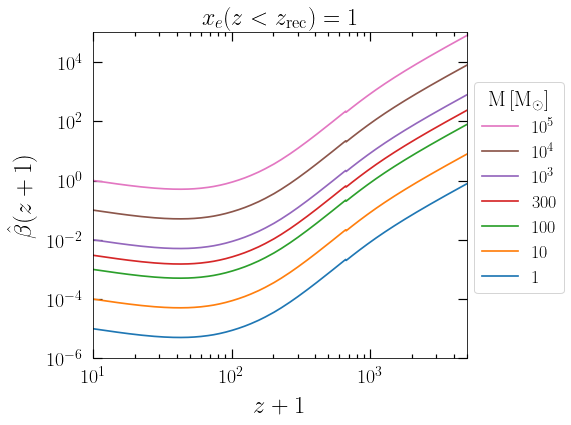

In [4]:
# When the electron fraction of the accreted gas after recombination is 
# considered as x_e = 1.


colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1, 1e4, 1000)
β_cap_array = np.zeros(len(z_array))


for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1
        β_cap_array[i] = β_cap(z, m)
    ax.loglog(z_array, β_cap_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)
plt.ylim(1e-6, 1e5)

plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\hat \beta(z+1)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = (1.02, 0.2), prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 24, pad = 8)
plt.savefig('βvsz_xe1.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# Plot of λ(z+1) given by Eq. 23 for PBHs accreting in absence of DM halos 
# around them, as per M. Ricotti et al. https://arxiv.org/pdf/0709.0524.pdf.


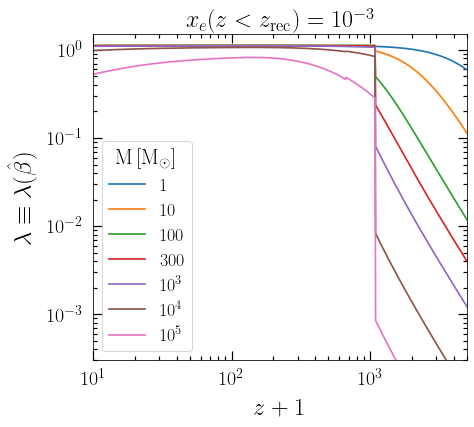

In [5]:
# When the electron fraction of the accreted gas after recombination is 
# considered as x_e = 1e-3.

colors = ['C0', 'C1','C2','C3','C4', 'C5', 'C6']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1, 10, 100, 300, 1e3, 1e4, 1e5])
z_array = np.geomspace(1, 1e4, 1000)
λ_array = np.zeros(len(z_array))


for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1e-3
        λ_array[i] = λ(z, m)
    ax.loglog(z_array, λ_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)
plt.ylim(3e-4, 1.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\lambda \equiv \lambda(\hat \beta)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$1$' ,  '$10$', '$100$', '$300$','$10^{3}$', '$10^{4}$','$10^{5}$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = 'lower left', prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 24, pad = 8)
plt.savefig('λvsz_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

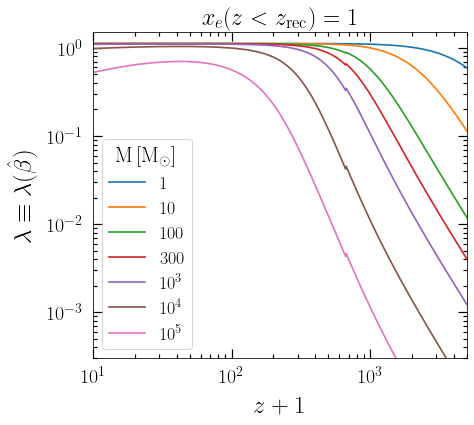

In [6]:
# When the electron fraction of the accreted gas after recombination is 
# considered as x_e = 1.

colors = ['C0', 'C1','C2','C3','C4', 'C5', 'C6']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1, 10, 100, 300, 1e3, 1e4, 1e5])
z_array = np.geomspace(1, 1e4, 1000)
λ_array = np.zeros(len(z_array))




for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1
        λ_array[i] = λ(z, m)
        
    ax.loglog(z_array, λ_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)
plt.ylim(3e-4, 1.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\lambda \equiv \lambda(\hat \beta)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$1$' ,  '$10$', '$100$', '$300$','$10^{3}$', '$10^{4}$','$10^{5}$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = 'lower left', prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 24, pad = 8)
plt.savefig('λvsz_xe1.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# Various accretion parameters of Park-Ricotti (PR) accretion model used in
# https://arxiv.org/abs/2012.10421.

# Here, the values of c_s, v_pbh and ρ are taken as per refernce M.Ricotti
# et al. https://arxiv.org/pdf/0709.0524.pdf for the calculations of 
# accretion via BHL Model.

# Also, the values of c_s,in, v_in, ρ_in are used as per Eq.(6), (8) and (9)
# of F. Scarcella et al. https://arxiv.org/abs/2012.10421.


# Here, we assume that the PBHs are isolated i.e. there is no preaccretion of
# DM halos around the PBHs.

In [7]:
# Definition of various parameters in the ionized region of
# PR accretion Model of F. Scarcella et al. https://arxiv.org/abs/2012.10421.


def c_s_in(z):
    return free_parameter * c_s(z)
def v_R(z):
    return  2 * c_s_in(z)
def v_D(z):
    return  (c_s(z)**2)/(2 * c_s_in(z))
def Δ(z):
    return (((v_pbh(z)**2) + (c_s(z)**2))**2) - (4 * (v_pbh(z)**2) * (c_s_in(z)**2)) 
def ρ_in_plus(z):
    return  ρ(z) * (((v_pbh(z)**2) + (c_s(z)**2) + np.sqrt(-Δ(z)))/(2 * (c_s_in(z)**2)))
def ρ_in_minus(z):
    return ρ(z) * (((v_pbh(z)**2) + (c_s(z)**2) - np.sqrt(-Δ(z)))/(2 * (c_s_in(z)**2)))
def ρ_in_0(z):
    return ρ(z) * (((v_pbh(z)**2) + (c_s(z)**2))/(2 * (c_s_in(z)**2)))
def ρ_in(z):
    if v_pbh(z) <= v_D(z):
        return ρ_in_plus(z)
    elif v_D(z) < v_pbh(z) < v_R(z):
        return ρ_in_0(z)
    else:
        return ρ_in_minus(z)

def v_in(z):
    if v_pbh(z) <= v_D(z):
        return (ρ(z)/ρ_in(z)) * v_pbh(z)
    elif v_D(z) < v_pbh(z) < v_R(z):
        return c_s_in(z)
    else:
        return (ρ(z)/ρ_in(z)) * v_pbh(z)

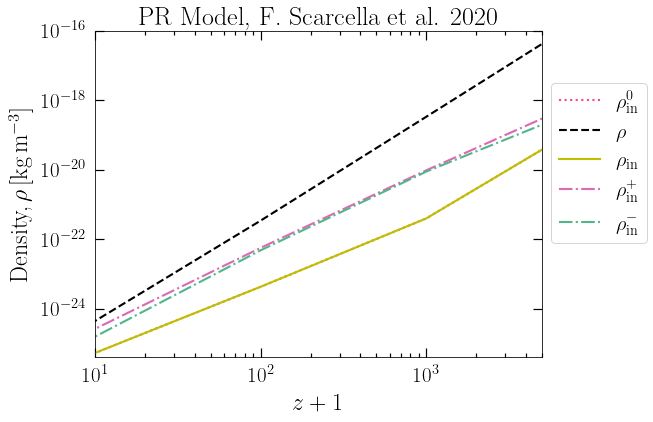

In [8]:
# Plot of the density of the accreted material inside the ionized region 
# of PR accretion Model as per https://arxiv.org/pdf/2012.10421.pdf.


fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 2.1)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_array = np.geomspace(1, 1e4, 5)
ρ_array = np.zeros(len(z_array))
ρ_in_array = np.zeros(len(z_array))
ρ_in_plus_array = np.zeros(len(z_array))
ρ_in_minus_array = np.zeros(len(z_array))
ρ_in_0_array = np.zeros(len(z_array))



free_parameter = 25
for i, z in enumerate(z_array):
    ρ_array[i] = ρ(z) * M_solar * (pc**-3) 
    ρ_in_array[i] = ρ_in(z) * M_solar * (pc**-3) 
    ρ_in_0_array[i] = ρ_in_0(z)  * M_solar * (pc**-3)
    ρ_in_plus_array[i] = ρ_in_plus(z) * M_solar * (pc**-3) 
    ρ_in_minus_array[i] = ρ_in_minus(z) * M_solar * (pc**-3) 


    
ax.loglog(z_array, ρ_in_0_array, '#fc4785', ls ='dotted')
ax.loglog(z_array, ρ_array, 'k', ls = '--')
ax.loglog(z_array, ρ_in_array, 'y')
ax.loglog(z_array, ρ_in_plus_array, '#dc69b6', ls ='-.')
ax.loglog(z_array, -ρ_in_minus_array, '#52b788', ls ='-.') 



ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)




plt.legend([r'$\rho_\mathrm{in}^{0}$', r'$\rho$', r'$\rho_\mathrm{in}$',
          r'$\rho_\mathrm{in}^{+}$', r'$\rho_\mathrm{in}^{-}$'],
           title_fontsize = 12, loc = (1.02, 0.35), prop = {"size":20.5})

        



plt.ylim(4e-26, 1e-16)
plt.xlim(10, 5000)

plt.ylabel(r"Density,$\, \rho\, \mathrm{[kg \,m^{-3}}]$ ", fontsize = 24, labelpad = 8)
plt.xlabel(r"$z + 1$", fontsize = 24, labelpad = 8)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.title('PR Model,  F. Scarcella et al. 2020', fontsize = 26, pad = 6)
plt.savefig('PR_densities.pdf', bbox_inches = 'tight')
plt.show()

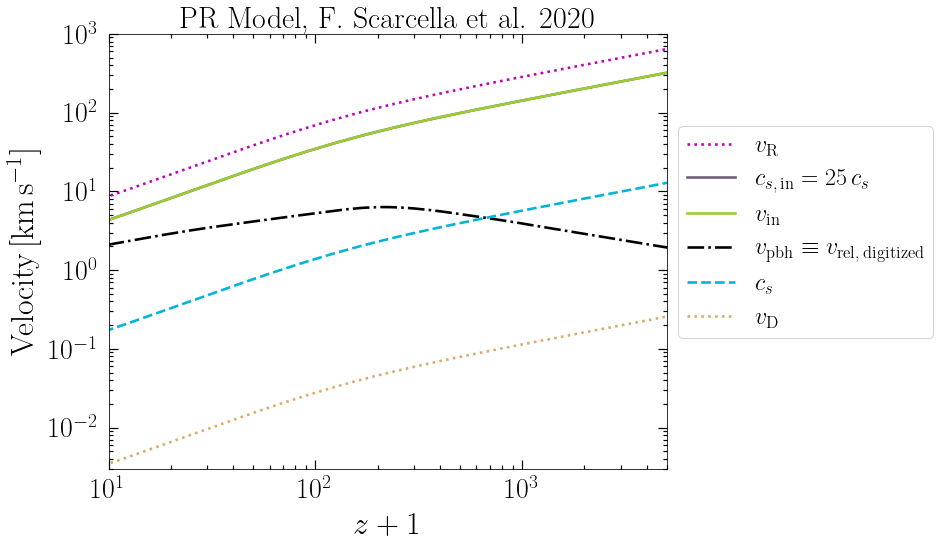

In [9]:
# Plot of the velocities of the PBH and of the 
# accreted material inside the ionized region 
# of PR accretion Model as per https://arxiv.org/pdf/2012.10421.pdf.

fig,ax = plt.subplots(1, figsize = (10, 8))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_array = np.geomspace(1, 1e4, 10000)
cs_array = np.zeros(len(z_array))
cs_in_array = np.zeros(len(z_array))
v_eff_array = np.zeros(len(z_array))
v_pbh_digitized_array = np.zeros(len(z_array))
v_in_array = np.zeros(len(z_array))
v_R_array = np.zeros(len(z_array))
v_D_array = np.zeros(len(z_array))


free_parameter = 25
for i, z in enumerate(z_array):
    cs_array[i] = c_s(z) * (pc/yr) * 1e-3 
    v_eff_array[i] = v_eff(z) * (pc/yr) * 1e-3 
    cs_in_array[i] = c_s_in(z) * (pc/yr) * 1e-3
    v_pbh_digitized_array[i] = v_pbh(z) * (pc/yr) * 1e-3 
    v_in_array[i] = v_in(z) * (pc/yr) * 1e-3
    v_R_array[i] = v_R(z) * (pc/yr) * 1e-3
    v_D_array[i] = v_D(z) * (pc/yr) * 1e-3
    
    
ax.loglog(z_array, v_R_array, 'm', ls = ':')
#ax.loglog(z_array, v_eff_in_array, '#3a86ff')
ax.loglog(z_array, cs_in_array, '#735d78')
ax.loglog(z_array, v_in_array, '#9acd32') 
ax.loglog(z_array, v_pbh_digitized_array, 'k', ls = '-.')
#ax.loglog(z_array, v_eff_array, 'k', ls = '-')
ax.loglog(z_array, cs_array, '#00b4d8', ls = '--')
ax.loglog(z_array, v_D_array, '#dcab6b', ls = ':') 

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)




plt.legend([r'$v_\mathrm{R}$', '$c_{s,\, \mathrm{in}} = 25 \,c_{s} $',
           '$v_{\mathrm{in}}$', r'$v_\mathrm{pbh} \equiv v_\mathrm{rel,\, digitized}$',
           '$c_{s}$' ,'$v_\mathrm{D}$'],
           title_fontsize = 12, loc = (1.02, 0.3), prop = {"size":24})

plt.ylim(3e-3, 1e3)
plt.xlim(10, 5000)
plt.ylabel(r"Velocity$\, \mathrm{[km \,s^{-1}}]$ ", fontsize = 32, labelpad = 8)
plt.xlabel(r"$z + 1$", fontsize = 32, labelpad = 8)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.title('PR Model,  F. Scarcella et al. 2020', fontsize = 30, pad = 6)
plt.savefig('PR_velocities.pdf', bbox_inches = 'tight')
plt.show()

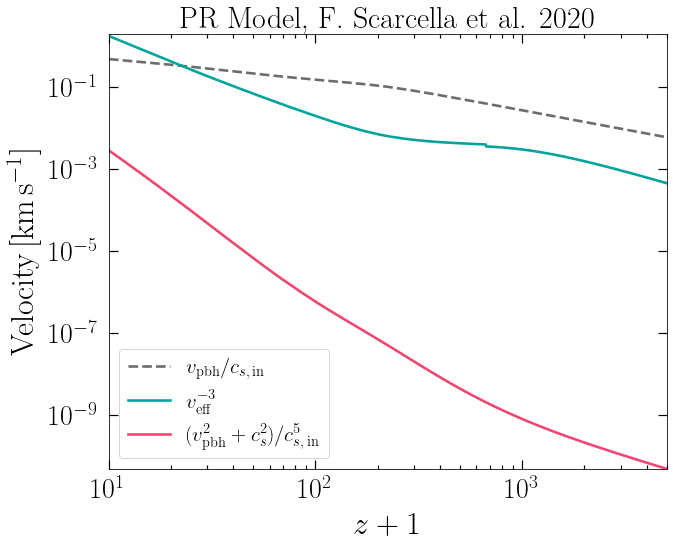

In [10]:
# Plot of the velocities of the PBH and of the 
# accreted material inside the ionized region 
# of PR accretion Model as per https://arxiv.org/pdf/2012.10421.pdf.

fig,ax = plt.subplots(1, figsize = (10, 8))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_array = np.geomspace(1, 1e4, 10000)
v_pbh_by_cs_in_array = np.zeros(len(z_array))
v_eff3_array = np.zeros(len(z_array))
v_PR_array =  np.zeros(len(z_array))
v_ratio_array =  np.zeros(len(z_array)) 
unit_change = (pc/yr) * 1e-3

free_parameter = 25
for i, z in enumerate(z_array):
    v_pbh_by_cs_in_array[i] =  v_pbh(z)/c_s_in(z)
    v_eff3_array[i] = (v_eff(z) * (pc/yr) * 1e-3)**(-3) 
    v_PR_array[i] = (v_pbh(z)**2 + c_s(z)**2) * (unit_change**2)/((c_s_in(z)* unit_change)**5)
    v_ratio_array[i] =  ((v_pbh(z)**2 + c_s(z)**2) * (unit_change**2)/((c_s_in(z)* unit_change)**5)/((v_eff(z) * (pc/yr) * 1e-3)**(3))) 
    
    
ax.loglog(z_array, v_pbh_by_cs_in_array, '#6d6b6b', ls = '--')
ax.loglog(z_array, v_eff3_array, '#00a49c')
ax.loglog(z_array, v_PR_array, '#ef476f') 
#ax.loglog(z_array, v_ratio_array, 'm') 


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)




plt.legend([r'$v_\mathrm{pbh}/c_{s, \, \mathrm{in}}$',  r'$v_\mathrm{eff}^{-3} $', '$(v_\mathrm{pbh}^{2} +c_{s}^{2} )/c_{s, \, \mathrm{in}}^{5}$' ,'$v_\mathrm{D}$'],
           title_fontsize = 12, loc = 'lower left', prop = {"size":21})


plt.xlim(10, 5000)
plt.ylim(5e-11, 2)
plt.ylabel(r"Velocity$\, \mathrm{[km \,s^{-1}}]$ ", fontsize = 32, labelpad = 8)
plt.xlabel(r"$z + 1$", fontsize = 32, labelpad = 8)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.title('PR Model,  F. Scarcella et al. 2020', fontsize = 30, pad = 6)
plt.savefig('PR_velocities_ratio.pdf', bbox_inches = 'tight')
plt.show()